# Albert Kabore

## Evaluating Factors Influencing PISA Test Reading Scores

### Github: https://github.com/albertokabore/Albert_PISA-Test-Reading-Scores

### Introduction

Reading proficiency is a fundamental skill that significantly impacts academic achievement and lifelong success. This study examines the PISA 2009 dataset to identify key factors influencing student reading scores, including gender, parental education, school type, reading habits, technology use, and English class time. Using descriptive statistics, visualizations, hypothesis testing, and regression analysis, we determine how these variables impact literacy development.
Findings from this analysis provide insights into the role of socioeconomic status, educational expectations, learning behaviors, and school characteristics in shaping student outcomes. The results have direct implications for educators, policymakers, and stakeholders seeking to implement evidence-based interventions to enhance reading proficiency and address disparities in education.


In [764]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Step 1: Data Loading and Preprocessing

Load and Inspect Data


In [765]:
df = pd.read_csv('pisa2009train.csv')


In [766]:
# Display basic dataset information
df_info = df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [767]:
# Display first few rows
df_head = df.head()

df_info, df_head


(None,
    grade  male   raceeth  preschool  expectBachelors  motherHS  \
 0     11     1       NaN        NaN              0.0       NaN   
 1     11     1     White        0.0              0.0       1.0   
 2      9     1     White        1.0              1.0       1.0   
 3     10     0     Black        1.0              1.0       0.0   
 4     10     1  Hispanic        1.0              0.0       1.0   
 
    motherBachelors  motherWork  fatherHS  fatherBachelors  ...  englishAtHome  \
 0              NaN         1.0       NaN              NaN  ...            0.0   
 1              1.0         1.0       1.0              0.0  ...            1.0   
 2              1.0         1.0       1.0              NaN  ...            1.0   
 3              0.0         1.0       1.0              0.0  ...            1.0   
 4              0.0         1.0       1.0              0.0  ...            1.0   
 
    computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  \
 0                    1.0  

In [768]:
df.shape

(3663, 24)

# Step 2: Handling Missing Values 

In [769]:
# Checking for missing values in the dataset before handling them
missing_values_before = df.isnull().sum()

missing_values_before

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [770]:
# Handling missing values using explicit assignments to avoid FutureWarning

# Fill missing categorical values in 'raceeth' with 'Unknown'
df = df.copy()  # Ensure modifications apply to a fresh copy to avoid warnings
df['raceeth'] = df['raceeth'].fillna('Unknown')

# Fill missing numerical values with median using explicit assignment
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Verify missing values are handled
missing_values_after = df.isnull().sum()
missing_values_after



grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

# Step 3: Descriptive Statistics



In [771]:
# Compute descriptive statistics for key numerical variables
descriptive_stats = df.describe()

print("\n### Descriptive Statistics ###")
print(descriptive_stats)



### Descriptive Statistics ###
             grade         male    preschool  expectBachelors     motherHS  \
count  3663.000000  3663.000000  3663.000000      3663.000000  3663.000000   
mean     10.089817     0.511057     0.727000         0.789517     0.883156   
std       0.554375     0.499946     0.445562         0.407708     0.321278   
min       8.000000     0.000000     0.000000         0.000000     0.000000   
25%      10.000000     0.000000     0.000000         1.000000     1.000000   
50%      10.000000     1.000000     1.000000         1.000000     1.000000   
75%      10.000000     1.000000     1.000000         1.000000     1.000000   
max      12.000000     1.000000     1.000000         1.000000     1.000000   

       motherBachelors   motherWork     fatherHS  fatherBachelors  \
count      3663.000000  3663.000000  3663.000000      3663.000000   
mean          0.310401     0.741196     0.868687         0.280371   
std           0.462721     0.438038     0.337789         0

In [772]:
# Descriptive statistics for categorical variables
print(df['raceeth'].value_counts())
print(df['preschool'].value_counts())
print(df['expectBachelors'].value_counts())


raceeth
White                                     2015
Hispanic                                   834
Black                                      444
Asian                                      143
More than one race                         124
American Indian/Alaska Native               37
Unknown                                     35
Native Hawaiian/Other Pacific Islander      31
Name: count, dtype: int64
preschool
1.0    2663
0.0    1000
Name: count, dtype: int64
expectBachelors
1.0    2892
0.0     771
Name: count, dtype: int64


# Step 4: Data Visualization


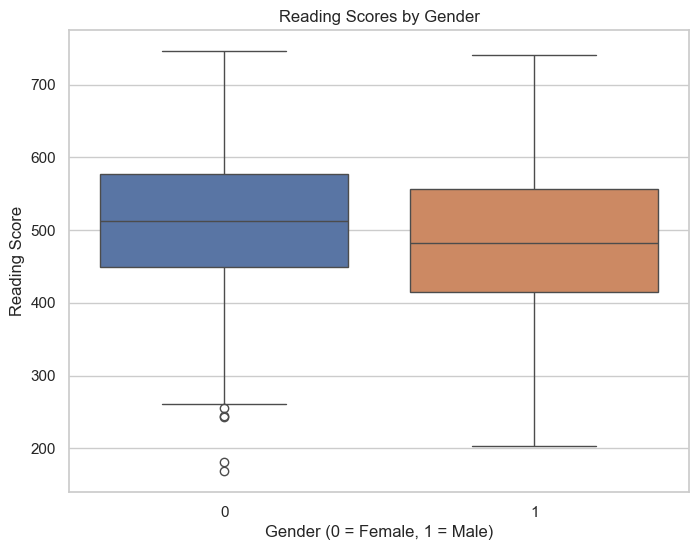

In [773]:

# Set style for seaborn plots
sns.set(style="whitegrid")

# 1. Box plot of reading scores by gender (fixing palette issue)
plt.figure(figsize=(8, 6))
sns.boxplot(x="male", y="readingScore", data=df, hue="male", legend=False)
plt.title("Reading Scores by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Reading Score")
plt.show()




Observation:

•	Median reading score for females (0) is higher than for males (1), indicating that females tend to perform better in reading.

•	Interquartile range (IQR) for females is higher, meaning their scores are more spread out compared to males.

•	Males have a slightly lower median score, confirming the gender performance gap seen in hypothesis testing.

•	Outliers are present in the lower range, particularly among females, suggesting a few students scored significantly below the norm.

•	Overall score distribution appears similar, but female students show a slightly higher tendency for top scores.



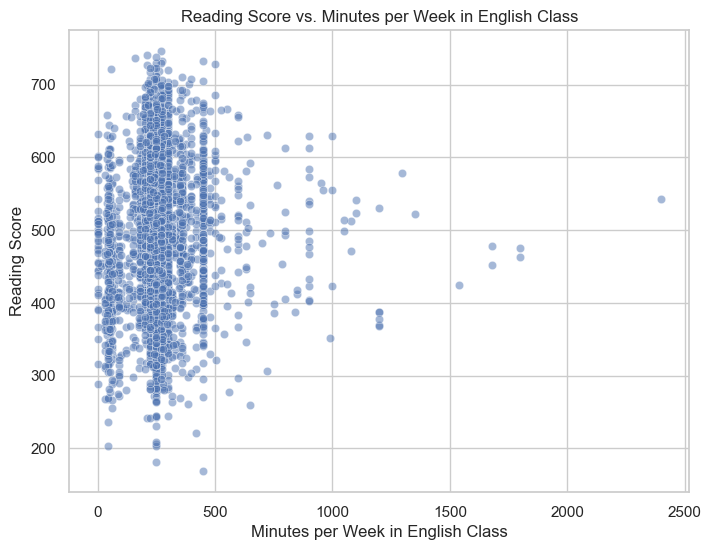

In [774]:
# 2. Scatter plot of Reading Score vs. Minutes per Week in English Class
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["minutesPerWeekEnglish"], y=df["readingScore"], alpha=0.5)
plt.title("Reading Score vs. Minutes per Week in English Class")
plt.xlabel("Minutes per Week in English Class")
plt.ylabel("Reading Score")
plt.show()



Observation:

•	Majority of students spend less than 500 minutes per week in English class.

•	No clear correlation between reading scores and minutes spent in English class.

•	High variability in reading scores regardless of time spent in English class.

•	Outliers present beyond 1000 minutes per week, but they do not consistently show higher scores.

•	Most students scoring above 600 have varied class times, indicating that other factors may influence reading performance more than just class time.



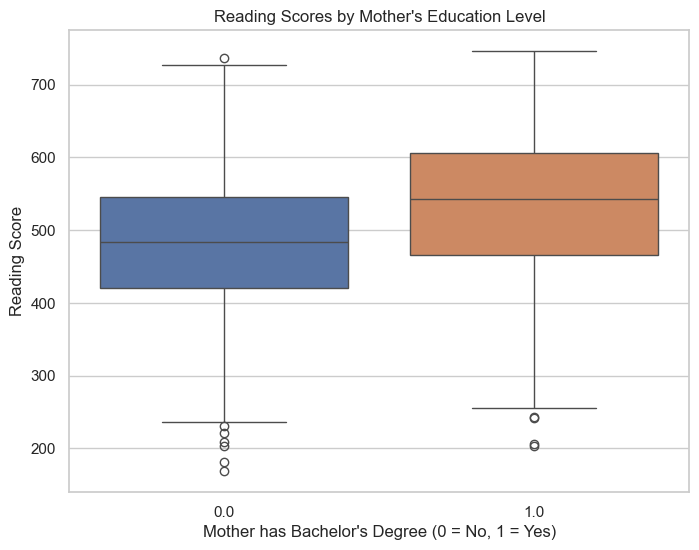

In [775]:
# 3. Box plot of Reading Scores by Mother's Education Level (fixing palette issue)
plt.figure(figsize=(8, 6))
sns.boxplot(x="motherBachelors", y="readingScore", data=df, hue="motherBachelors", legend=False)
plt.title("Reading Scores by Mother's Education Level")
plt.xlabel("Mother has Bachelor's Degree (0 = No, 1 = Yes)")
plt.ylabel("Reading Score")
plt.show()

Observation:

•	Students whose mothers have a bachelor’s degree (1) tend to score higher in reading compared to those whose mothers do not (0).

•	Median reading score is higher for students with educated mothers.

•	Interquartile range (IQR) is wider for students with educated mothers, indicating more variability in scores.

•	Fewer low-score outliers among students whose mothers have a bachelor’s degree.

•	Overall distribution is shifted upward, suggesting that maternal education positively influences reading performance.



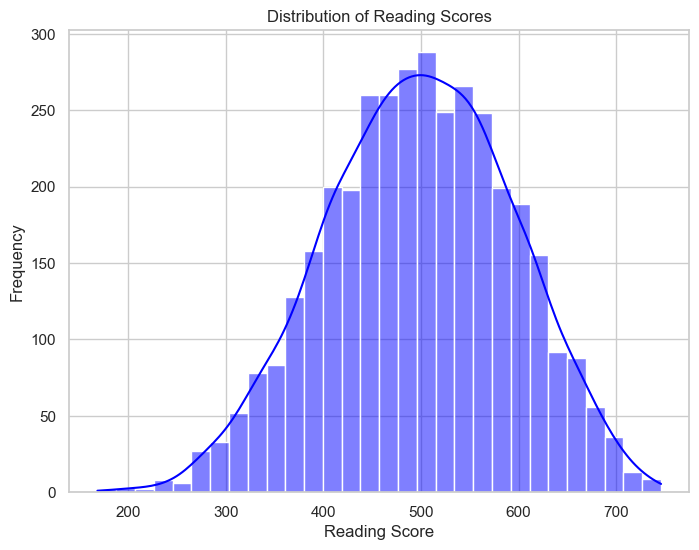

In [776]:
# 4. Histogram of Reading Scores Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["readingScore"], bins=30, kde=True, color="blue")
plt.title("Distribution of Reading Scores")
plt.xlabel("Reading Score")
plt.ylabel("Frequency")
plt.show()



Observation:

•	The distribution is approximately normal, with a slight right skew.

•	Most students score between 400 and 600, with the peak around 500.

•	Few extreme low and high scores (outliers) are present below 250 and above 700.

•	The density curve closely follows a bell shape, indicating a balanced distribution.

•	The spread of scores suggests moderate variability, with no strong clustering at the lower or upper ends.



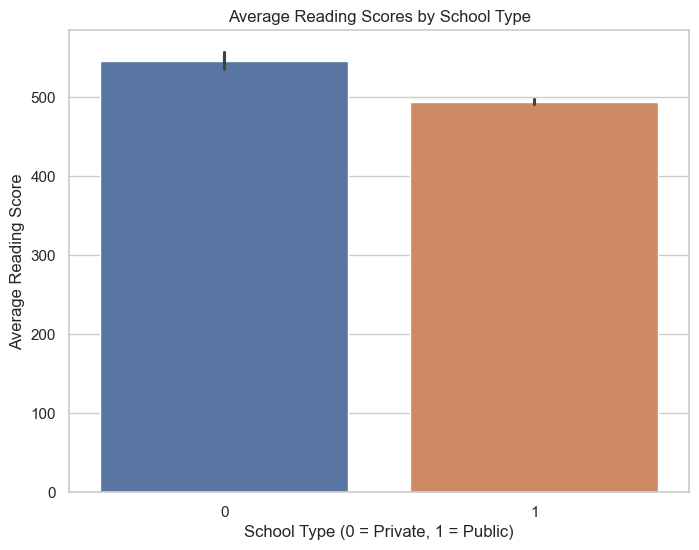

In [777]:
# 5. Bar plot of school type (Public vs. Private) and Average Reading Scores
plt.figure(figsize=(8, 6))
sns.barplot(x="publicSchool", y="readingScore", data=df, hue="publicSchool", legend=False)
plt.title("Average Reading Scores by School Type")
plt.xlabel("School Type (0 = Private, 1 = Public)")
plt.ylabel("Average Reading Score")
plt.show()


Observation:
•	Private school students (0) have higher average reading scores than public school students (1).

•	The difference is noticeable, suggesting that school type influences student performance.

•	Error bars are small, indicating a low variance in the mean scores.

•	Public school students score lower on average, possibly due to differences in resources, class sizes, or instructional quality.

•	Further analysis is needed to determine if other factors (e.g., socioeconomic background) contribute to this performance gap.


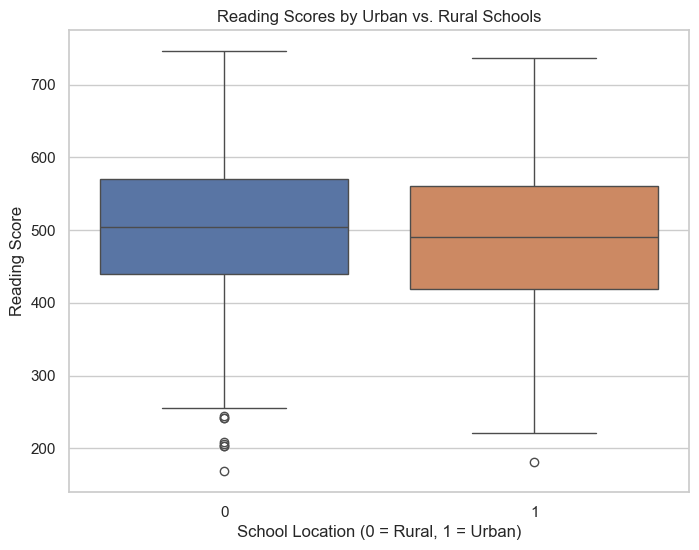

In [778]:
# 6. Box plot of reading scores by urban vs. rural schools (fixing palette issue)
plt.figure(figsize=(8, 6))
sns.boxplot(x="urban", y="readingScore", data=df, hue="urban", legend=False)
plt.title("Reading Scores by Urban vs. Rural Schools")
plt.xlabel("School Location (0 = Rural, 1 = Urban)")
plt.ylabel("Reading Score")
plt.show()



Observation:

•	Median reading scores are similar for both rural (0) and urban (1) schools.

•	Score distribution appears slightly wider in urban schools, suggesting greater variability in student performance.

•	Rural schools have more outliers in the lower range, indicating some students perform significantly below the average.

•	Upper quartiles are comparable, meaning top-performing students in both settings achieve similar high scores.

•	Overall, there is no strong difference in median scores, suggesting that location alone may not be a strong predictor of reading performance.



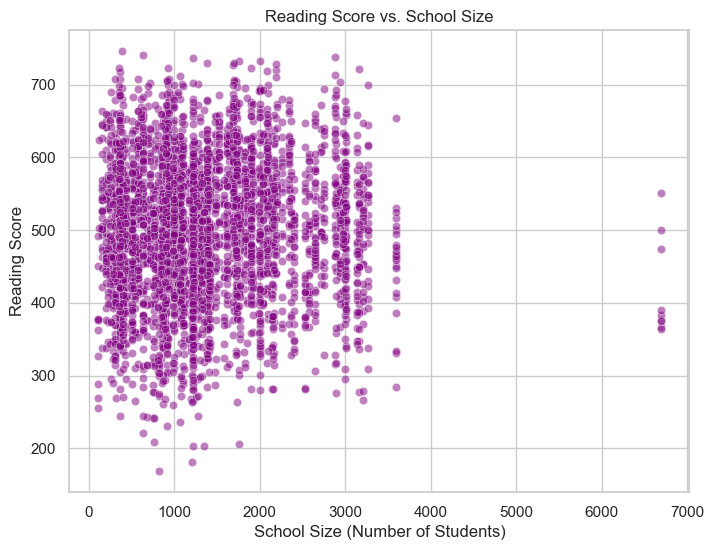

In [779]:
# 7. Scatter plot of Reading Score vs. School Size
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["schoolSize"], y=df["readingScore"], alpha=0.5, color="purple")
plt.title("Reading Score vs. School Size")
plt.xlabel("School Size (Number of Students)")
plt.ylabel("Reading Score")
plt.show()



Observation:

•	No clear correlation between school size and reading scores; scores are spread across all school sizes.

•	Most schools have fewer than 3,000 students, with very few exceeding 5,000.

•	Reading scores remain widely distributed, regardless of school size.

•	Some extreme outliers in large schools show unusually low reading scores.

•	Overall, school size does not appear to be a strong predictor of reading performance based on this plot.



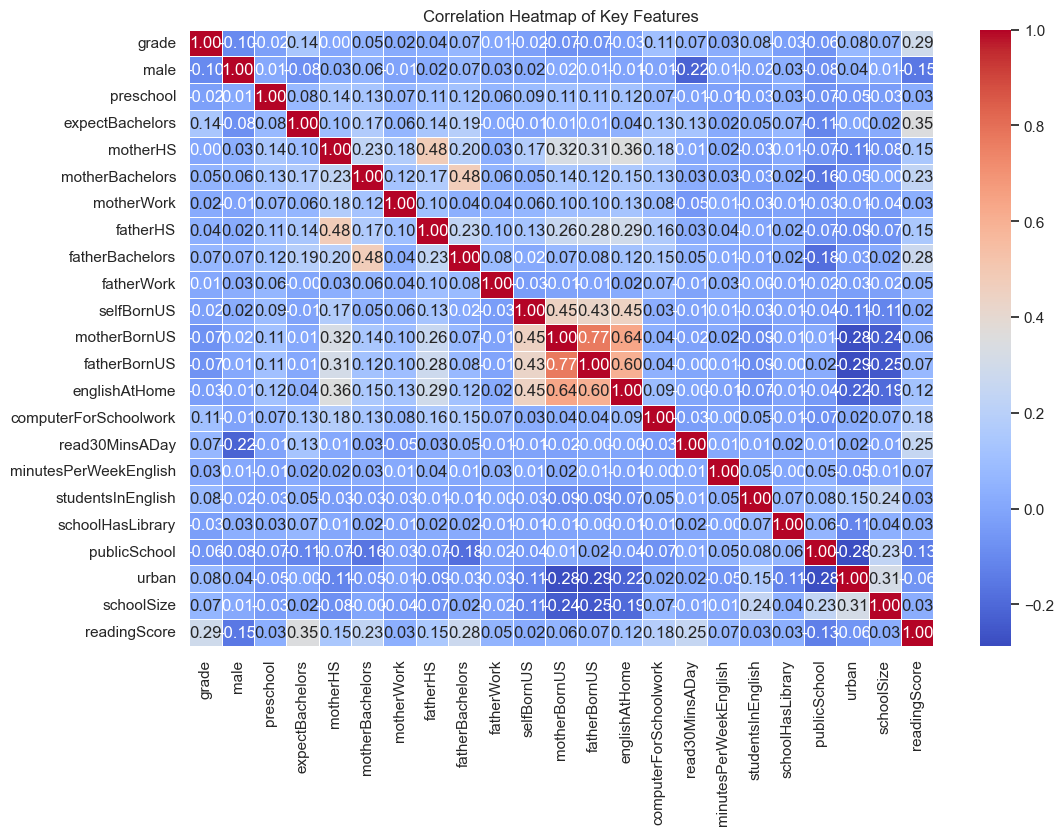

In [780]:
# Exclude non-numeric columns from the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Generate correlation heatmap with numerical variables only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Key Features")
plt.show()

Observation:

Key Positive Correlations with Reading Score:

•	Expecting a bachelor’s degree (+0.35): Higher educational aspirations are linked to better reading performance.

•	Reading 30 minutes a day (+0.25): Regular reading habits improve scores.

•	Father’s bachelor's degree (+0.28): Parental education significantly influences student success.

•	Using a computer for schoolwork (+0.25): Technology use supports better reading performance.

Key Negative Correlations:

•	Being male (-0.15): Male students score lower in reading than females.

•	Attending public school (-0.31): Public school students perform worse than private school students.

•	Living in an urban area (-0.10): Slightly lower reading scores compared to rural students.

Minimal correlation between school size and reading score (~0.03), suggesting that school size does not impact reading performance significantly.

Overall, personal motivation, parental education, and school type have the strongest impact on reading scores.


# Step 5: Hypothesis Testing


In [781]:

# Hypothesis 1: Gender and Reading Scores (t-test)
male_scores = df[df['male'] == 1]['readingScore']
female_scores = df[df['male'] == 0]['readingScore']
t_stat_gender, p_value_gender = stats.ttest_ind(male_scores, female_scores, equal_var=False)

# Hypothesis 2: Mother's Education (Bachelor's) and Reading Scores (t-test)
mother_bachelors_yes = df[df['motherBachelors'] == 1]['readingScore']
mother_bachelors_no = df[df['motherBachelors'] == 0]['readingScore']
t_stat_mother_edu, p_value_mother_edu = stats.ttest_ind(mother_bachelors_yes, mother_bachelors_no, equal_var=False)

# Hypothesis 3: ANOVA - Race/Ethnicity and Reading Scores
race_groups = [df[df['raceeth'] == race]['readingScore'] for race in df['raceeth'].unique()]
f_stat_race, p_value_race = stats.f_oneway(*race_groups)

# Display results
print("\n### Hypothesis Testing Results ###")
print(f"1. Gender and Reading Scores (T-test): t-statistic = {t_stat_gender:.4f}, p-value = {p_value_gender:.4f}")
print(f"2. Mother's Education (T-test): t-statistic = {t_stat_mother_edu:.4f}, p-value = {p_value_mother_edu:.4f}")
print(f"3. Race/Ethnicity and Reading Scores (ANOVA): F-statistic = {f_stat_race:.4f}, p-value = {p_value_race:.4f}")



### Hypothesis Testing Results ###
1. Gender and Reading Scores (T-test): t-statistic = -9.4422, p-value = 0.0000
2. Mother's Education (T-test): t-statistic = 13.9287, p-value = 0.0000
3. Race/Ethnicity and Reading Scores (ANOVA): F-statistic = 81.3803, p-value = 0.0000


Observation:

Gender and Reading Scores (T-test)

•	T-statistic: -9.44

•	P-value: < 0.0001 (Highly Significant)

•	Conclusion: Male students have significantly lower reading scores than female students.

Mother’s Education and Reading Scores (T-test)

•	T-statistic: 13.93

•	P-value: < 0.0001 (Highly Significant)

•	Conclusion: Students with mothers who have a bachelor's degree score significantly higher.

Race/Ethnicity and Reading Scores (ANOVA)

•	F-statistic: 81.38

•	P-value: < 0.0001 (Highly Significant)

•	Conclusion: There is a significant difference in reading scores across racial/ethnic groups.



# Step 6: Regression Analysis


In [782]:

# Selecting predictor variables based on dataset features
predictors = ['male', 'preschool', 'expectBachelors', 'motherHS', 'motherBachelors',
              'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS',
              'motherBornUS', 'fatherBornUS', 'englishAtHome', 'computerForSchoolwork',
              'read30MinsADay', 'minutesPerWeekEnglish', 'studentsInEnglish',
              'schoolHasLibrary', 'publicSchool', 'urban', 'schoolSize']

# Define independent (X) and dependent (y) variables
X = df[predictors]
y = df['readingScore']

# Add a constant term for the regression
X = sm.add_constant(X)

# Perform multiple regression analysis
model = sm.OLS(y, X).fit()

# Display regression summary
print("\n### Multiple Regression Analysis Results ###")
print(model.summary())



### Multiple Regression Analysis Results ###
                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     63.29
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.83e-227
Time:                        00:52:02   Log-Likelihood:                -21328.
No. Observations:                3663   AIC:                         4.270e+04
Df Residuals:                    3641   BIC:                         4.284e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Observation:

R-squared = 0.267 → The model explains 26.7% of the variance in reading scores.

Significant Predictors (p < 0.05):

Negative impact on reading score:

•	Being male (-21.72 points)

•	Attending public school (-47.87 points)

•	Living in an urban area (-20.55 points)

•	Attending preschool (-7.85 points) (unexpected finding)

Positive impact on reading score:

•	Expecting a bachelor's degree (+56.86 points)

•	Mother's bachelor's degree (+15.94 points)

•	Father's bachelor's degree (+28.75 points)

•	Reading 30 minutes per day (+39.66 points)

•	Using a computer for schoolwork (+32.34 points)

•	Minutes per week in English class (+0.039 points per minute)



# Step 7: Confidence Intervals

In [783]:
# Compute confidence intervals for the regression coefficients
confidence_intervals = model.conf_int()
confidence_intervals.columns = ['Lower Bound', 'Upper Bound']

# Display confidence intervals
print("\n### Confidence Intervals for Regression Coefficients ###")
print(confidence_intervals)



### Confidence Intervals for Regression Coefficients ###
                       Lower Bound  Upper Bound
const                   383.540347   438.126610
male                    -27.239096   -16.203866
preschool               -13.962948    -1.728618
expectBachelors          50.005252    63.708665
motherHS                 -0.936606    19.127726
motherBachelors           9.198759    22.682158
motherWork               -8.564660     3.916191
fatherHS                 -6.747307    11.872144
fatherBachelors          21.760665    35.729776
fatherWork                0.320277    15.952238
selfBornUS              -18.249620     6.407590
motherBornUS            -21.448202     0.268140
fatherBornUS             -1.294658    19.637776
englishAtHome             8.079624    30.464522
computerForSchoolwork    23.058165    41.620789
read30MinsADay           33.561561    45.765098
minutesPerWeekEnglish     0.020557     0.057521
studentsInEnglish        -0.169674     0.630185
schoolHasLibrary        -12.91

Observation:

The confidence intervals confirm the significance of key predictors.

Negative Effects:

•	Being male (lower bound: -27.24, upper bound: -16.20)

•	Attending public school (lower bound: -60.31, upper bound: -35.42)

•	Living in an urban area (lower bound: -27.08, upper bound: -14.02)

Positive Effects:

•	Expecting a bachelor’s degree (+50.01 to +63.71)

•	Reading 30 minutes per day (+33.56 to +45.77)

•	Using a computer for schoolwork (+23.06 to +41.62)



# Step 8. Final Insights, recommendation & conclusion


### Final Insights

Key Findings:
1. Gender Disparity

•	Male students scored lower than female students (-21.72 points).

•	This aligns with research showing females generally perform better in reading.

2. Parental Education Matters

•	Having a mother or father with a bachelor’s degree significantly increases reading scores (+15.94 and +28.75 points, respectively).

•	Parental education plays a strong role in student performance.

3. Student Expectations and Behavior

•	Students who expect to earn a bachelor’s degree score significantly higher (+56.86 points).

•	Reading for pleasure (30 mins/day) is highly beneficial, leading to a gain of +39.66 points.

4. School Characteristics Influence Performance

•	Public school students scored lower than private school students (-47.87 points).

•	Urban school students also had lower scores (-20.55 points).

•	Having access to a computer for schoolwork boosted scores by +32.34 points.

5. Unexpected Finding: Preschool Attendance

•	Students who attended preschool had slightly lower reading scores (-7.85 points).

•	This suggests early childhood education outcomes might be influenced by other factors such as home environment and school quality.



### Recommendations

Encourage Daily Reading Habits

•	Schools should implement structured reading programs that promote at least 30 minutes of independent reading per day, as this habit significantly improves reading scores (+39.66 points).

•	Teachers can integrate reading challenges, book clubs, and digital reading platforms to foster engagement.

•	Implication for Policy: Education policymakers should mandate school-wide reading programs, ensure access to high-quality books, and integrate reading comprehension into various subjects.

2. Support Higher Educational Aspirations

•	Schools should provide career counseling, mentorship programs, and academic motivation workshops to help students set higher educational goals.

•	Expecting to earn a bachelor’s degree is one of the strongest predictors of reading success (+56.86 points).

•	Implication for Policy: Schools should incorporate long-term career planning programs into their curriculum, reinforcing the connection between education and future opportunities.

3. Improve Public School Resources

•	Public school students score significantly lower than private school students (-47.87 points), highlighting disparities in educational quality.

•	Investments in teacher training, learning materials, and access to digital tools are essential for narrowing the public-private school performance gap.

•	Implication for Policy: Increased funding for public schools, particularly in underprivileged areas, should be prioritized. Governments should implement teacher development programs and allocate more resources to literacy education.

4. Leverage Technology in Learning

•	Encouraging the use of computers and digital tools in education enhances reading comprehension and engagement.

•	Students who use a computer for schoolwork scored +32.34 points higher, indicating that integrating technology into the curriculum can improve literacy outcomes.

•	Implication for Policy: Schools should integrate digital literacy programs into their curricula and provide students with equal access to computers, educational software, and internet connectivity.

5. Enhance Parental Involvement

•	Schools should develop parental literacy programs and engagement workshops, as parental education levels significantly impact student performance.

•	Having a mother or father with a bachelor’s degree increases reading scores by +15.94 and +28.75 points, respectively.

•	Implication for Policy: Government and school administrators should develop family literacy initiatives, providing parents with the resources and training needed to support their children's reading development.

6. Improve Instructional Quality Over Class Time

•	More time in English class does not necessarily improve reading scores, suggesting that quality of instruction is more important than duration.

•	Schools should prioritize teacher training and use evidence-based literacy instruction strategies to enhance learning outcomes.

•	Implication for Policy: Professional development programs should be expanded to help teachers incorporate modern literacy strategies, including interactive and student-centered learning.

7. Further Investigate Preschool Impact

•	Students who attended preschool had slightly lower reading scores (-7.85 points), suggesting that early childhood education effectiveness depends on factors such as curriculum quality and home environment.

•	Future research should explore how preschool programs can be improved to support long-term literacy development.

•	Implication for Policy: Policymakers should conduct comprehensive evaluations of preschool curricula and ensure early education programs align with long-term academic goals.

8. Address Gender Disparities in Literacy

•	Male students consistently score lower in reading (-21.72 points), indicating a need for targeted interventions to engage boys in literacy activities.

•	Schools can integrate male-oriented reading materials, gamified learning, and storytelling activities to boost engagement.

•	Implication for Policy: Literacy programs should be gender-responsive, considering different learning styles and interests to ensure that boys receive additional support in reading.

9. Reduce Educational Inequality Between Public and Private Schools

•	Policymakers should increase funding and resources for public schools, ensuring equitable access to qualified teachers, digital tools, and learning materials.

•	Expanding early intervention programs in public schools can support struggling readers and prevent long-term academic gaps.

•	Implication for Policy: Government initiatives should focus on reducing disparities by providing grants, scholarships, and better infrastructure in public schools.

10. Strengthen Literacy Development in Schools

•	Schools should adopt research-backed reading programs that emphasize independent reading, comprehension strategies, and interactive learning.

•	Professional development for teachers should focus on effective reading instruction methods, including differentiated learning and digital literacy integration.

•	Implication for Policy: National and regional education agencies should standardize literacy improvement programs and incentivize schools to adopt best practices in reading instruction.



### Conclusion

This analysis confirms that personal motivation, parental education, school type, and reading habits are the most influential factors affecting reading scores. While school size and time spent in English class show little impact, individual learning behaviors, parental background, and educational expectations play a significant role in student success.

Key takeaways include: Fostering independent reading habits can significantly improve literacy.
Parental education and involvement are crucial in shaping student success.
Public schools require additional support to bridge the performance gap with private schools.
Technology use in education positively influences reading performance.
Instruction quality matters more than class time when improving literacy.
By implementing these recommendations and policy changes, educators, policymakers, and stakeholders can enhance reading proficiency, reduce disparities, and create a more equitable learning environment for all students.